In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train_data = pd.read_csv('train.csv')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [9]:
test_data = pd.read_csv('test.csv')
test_data

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [11]:
customer_transaction_data = pd.read_csv('customer_transaction_data.csv')
customer_transaction_data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [12]:
customer_transaction_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [13]:
customer_transaction_data = customer_transaction_data.sample(n=5000)

In [14]:
customer_transaction_data = customer_transaction_data.drop(['date','item_id'],axis=1)
customer_transaction_data

,customer_id,quantity,selling_price,other_discount,coupon_discount
853648,1044,2,99.02,0.00,0.0
488092,1281,1,45.95,0.00,0.0
1088369,722,2,106.86,-84.78,0.0
399034,429,4,64.12,0.00,0.0
972929,230,1,70.88,-28.50,0.0
...,...,...,...,...,...
993942,316,1,63.76,-3.56,0.0
942520,1460,1,44.52,-8.55,0.0
865550,1248,2,71.24,-71.24,0.0
367526,1203,1,124.31,0.00,0.0


In [15]:
train_transaction_data = pd.merge(train_data, customer_transaction_data, left_on = 'customer_id', right_on = 'customer_id')
train_transaction_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount
0,1,13,27,1053,0,2,248.98,-248.98,0.0
1,2444,13,513,1053,0,2,248.98,-248.98,0.0
2,3651,13,166,1053,0,2,248.98,-248.98,0.0
3,7712,13,766,1053,0,2,248.98,-248.98,0.0
4,15317,13,165,1053,0,2,248.98,-248.98,0.0
...,...,...,...,...,...,...,...,...,...
304357,106346,26,476,1508,0,1,38.83,0.00,0.0
304358,113243,26,466,1508,0,1,38.83,0.00,0.0
304359,114243,26,353,1508,0,1,38.83,0.00,0.0
304360,128122,26,468,1508,0,1,38.83,0.00,0.0


In [16]:
test_transaction_data = pd.merge(test_data, customer_transaction_data, left_on = 'customer_id', right_on = 'customer_id')
test_transaction_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount
0,3,22,869,967,1,240.08,0.00,0.00
1,3,22,869,967,1,35.62,0.00,0.00
2,3,22,869,967,1,53.43,-17.45,0.00
3,3,22,869,967,1,113.63,0.00,0.00
4,3,22,869,967,1,106.50,-28.50,0.00
...,...,...,...,...,...,...,...,...
228820,69055,24,43,1286,1,106.50,0.00,0.00
228821,94183,24,42,710,1,131.79,-176.68,0.00
228822,94183,24,42,710,1,35.62,-5.70,-17.81
228823,106228,24,43,710,1,131.79,-176.68,0.00


 selling price vs redemption status

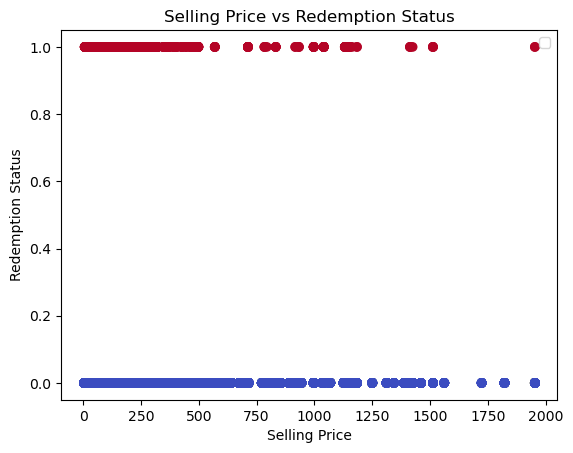

In [17]:
selling_price = train_transaction_data['selling_price']
redemption_status = train_transaction_data['redemption_status']
plt.scatter(selling_price, redemption_status, c=redemption_status, cmap='coolwarm')
plt.xlabel('Selling Price')
plt.ylabel('Redemption Status')
plt.title('Selling Price vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels, loc='upper right')
plt.show()

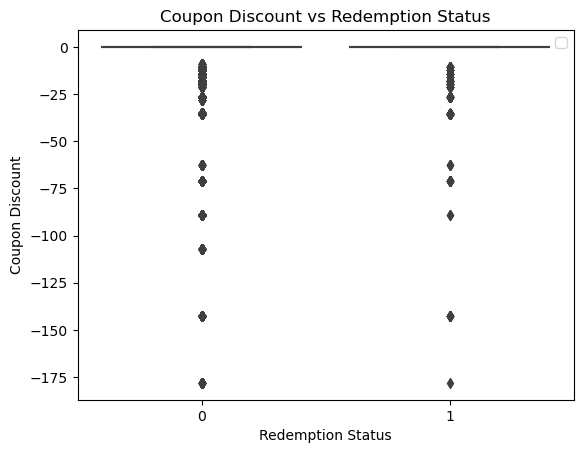

In [18]:
sns.boxplot(x='redemption_status', y='coupon_discount', data=train_transaction_data)
plt.xlabel('Redemption Status')
plt.ylabel('Coupon Discount')
plt.title('Coupon Discount vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

In [19]:
customer_demographics_data = pd.read_csv('customer_demographics.csv')
customer_demographics_data

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [20]:
train_transaction_demographic_data = pd.merge(train_transaction_data, customer_demographics_data, left_on='customer_id', right_on = 'customer_id')
train_transaction_demographic_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5
1,2444,13,513,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5
2,3651,13,166,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5
3,7712,13,766,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5
4,15317,13,165,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194317,114906,26,947,507,0,1,26.71,0.00,0.0,70+,Married,0,2,NaN,6
194318,118711,26,2,507,0,1,106.86,-21.02,0.0,70+,Married,0,2,NaN,6
194319,118711,26,2,507,0,1,26.71,0.00,0.0,70+,Married,0,2,NaN,6
194320,128256,26,629,507,0,1,106.86,-21.02,0.0,70+,Married,0,2,NaN,6


In [21]:
test_transaction_demographic_data = pd.merge(test_transaction_data, customer_demographics_data, left_on = 'customer_id', right_on = 'customer_id')
test_transaction_demographic_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,1,240.08,0.00,0.00,36-45,NaN,0,1,NaN,5
1,3,22,869,967,1,35.62,0.00,0.00,36-45,NaN,0,1,NaN,5
2,3,22,869,967,1,53.43,-17.45,0.00,36-45,NaN,0,1,NaN,5
3,3,22,869,967,1,113.63,0.00,0.00,36-45,NaN,0,1,NaN,5
4,3,22,869,967,1,106.50,-28.50,0.00,36-45,NaN,0,1,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153710,42343,24,43,1424,1,43.10,-4.63,0.00,46-55,Married,0,4,2,5
153711,42343,24,43,1424,1,85.13,0.00,-35.62,46-55,Married,0,4,2,5
153712,123403,24,42,1424,1,35.26,-24.93,0.00,46-55,Married,0,4,2,5
153713,123403,24,42,1424,1,43.10,-4.63,0.00,46-55,Married,0,4,2,5


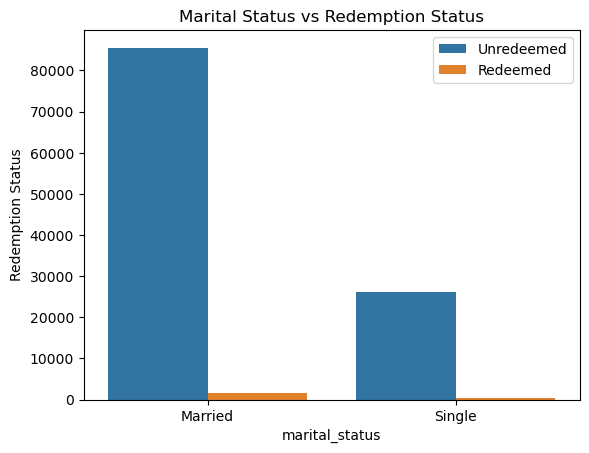

In [22]:
sns.countplot(x='marital_status', hue='redemption_status', data=train_transaction_demographic_data)
plt.xlabel('marital_status')
plt.ylabel('Redemption Status')
plt.title('Marital Status vs Redemption Status')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

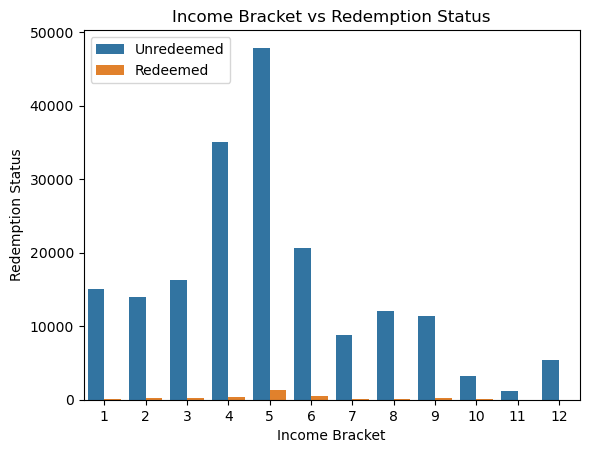

In [23]:
sns.countplot(x='income_bracket', hue='redemption_status', data=train_transaction_demographic_data)
plt.xlabel('Income Bracket')
plt.ylabel('Redemption Status')
plt.title('Income Bracket vs Redemption Status')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

In [24]:
campaign_data = pd.read_csv('campaign_data.csv')
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [25]:
train_data = pd.merge(train_transaction_demographic_data, campaign_data, left_on = 'campaign_id', right_on = 'campaign_id')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date
0,1,13,27,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5,X,19/05/13,05/07/13
1,2444,13,513,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5,X,19/05/13,05/07/13
2,3651,13,166,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5,X,19/05/13,05/07/13
3,7712,13,766,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5,X,19/05/13,05/07/13
4,15317,13,165,1053,0,2,248.98,-248.98,0.0,46-55,NaN,0,1,NaN,5,X,19/05/13,05/07/13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194317,124083,27,728,1378,0,1,35.62,-21.02,0.0,26-35,NaN,0,4,2,8,Y,25/08/12,27/10/12
194318,124083,27,728,1378,0,1,99.38,0.00,0.0,26-35,NaN,0,4,2,8,Y,25/08/12,27/10/12
194319,124083,27,728,1378,0,1,142.12,0.00,0.0,26-35,NaN,0,4,2,8,Y,25/08/12,27/10/12
194320,124083,27,728,1378,0,1,177.03,0.00,0.0,26-35,NaN,0,4,2,8,Y,25/08/12,27/10/12


In [26]:
test_data = pd.merge(test_transaction_demographic_data, campaign_data, left_on = 'campaign_id', right_on = 'campaign_id')
test_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date
0,3,22,869,967,1,240.08,0.00,0.00,36-45,NaN,0,1,NaN,5,X,16/09/13,18/10/13
1,3,22,869,967,1,35.62,0.00,0.00,36-45,NaN,0,1,NaN,5,X,16/09/13,18/10/13
2,3,22,869,967,1,53.43,-17.45,0.00,36-45,NaN,0,1,NaN,5,X,16/09/13,18/10/13
3,3,22,869,967,1,113.63,0.00,0.00,36-45,NaN,0,1,NaN,5,X,16/09/13,18/10/13
4,3,22,869,967,1,106.50,-28.50,0.00,36-45,NaN,0,1,NaN,5,X,16/09/13,18/10/13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153710,42343,24,43,1424,1,43.10,-4.63,0.00,46-55,Married,0,4,2,5,Y,21/10/13,20/12/13
153711,42343,24,43,1424,1,85.13,0.00,-35.62,46-55,Married,0,4,2,5,Y,21/10/13,20/12/13
153712,123403,24,42,1424,1,35.26,-24.93,0.00,46-55,Married,0,4,2,5,Y,21/10/13,20/12/13
153713,123403,24,42,1424,1,43.10,-4.63,0.00,46-55,Married,0,4,2,5,Y,21/10/13,20/12/13


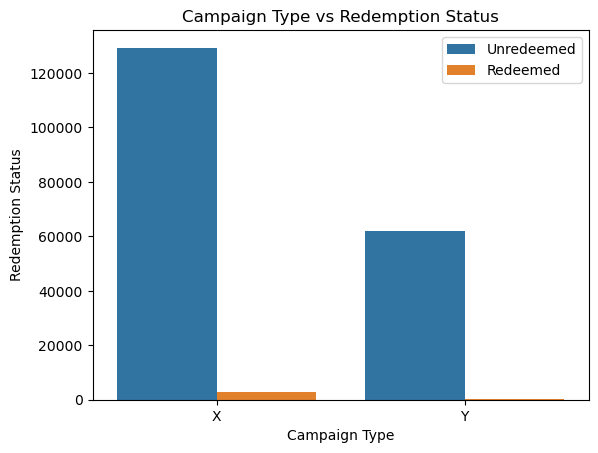

In [27]:
sns.countplot(x='campaign_type', hue='redemption_status', data=train_data)
plt.xlabel('Campaign Type')
plt.ylabel('Redemption Status')
plt.title('Campaign Type vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

In [28]:
coupon_mapping_data = pd.read_csv('coupon_item_mapping.csv')
coupon_mapping_data

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
...,...,...
92658,32,69268
92659,32,68502
92660,32,68612
92661,33,71390


In [29]:
coupon_mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [30]:
item_data = pd.read_csv('item_data.csv')
item_data

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
...,...,...,...,...
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical


In [31]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [32]:
coupon_item_data = pd.merge(coupon_mapping_data, item_data, left_on = 'item_id', right_on = 'item_id')
coupon_item_data

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery
...,...,...,...,...,...
92658,33,68764,3867,Established,Meat
92659,29,74013,5383,Established,Miscellaneous
92660,29,71965,4554,Established,Miscellaneous
92661,29,67815,4985,Established,Flowers & Plants


In [33]:
coupon_item_data = coupon_item_data.sample(n=50000)
coupon_item_data

,coupon_id,item_id,brand,brand_type,category
82072,23,23695,1162,Established,Pharmaceutical
80527,23,16106,56,Local,Pharmaceutical
3194,42,6453,120,Established,Grocery
47048,6,28103,133,Established,Grocery
84876,23,16388,866,Established,Skin & Hair Care
...,...,...,...,...,...
35044,8,11947,2573,Established,Meat
24071,32,63578,16,Established,Skin & Hair Care
25626,6,69174,147,Established,Grocery
74566,21,6261,56,Local,Grocery


In [34]:
train_data = train_data.sample(n=100000)
train_data = pd.merge(train_data, coupon_item_data, left_on = 'coupon_id', right_on = 'coupon_id')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,age_range,...,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,43382,13,865,1464,0,1,35.62,0.00,0.0,18-25,...,1,NaN,1,X,19/05/13,05/07/13,71648,1061,Established,Grocery
1,43382,13,865,1464,0,1,35.62,0.00,0.0,18-25,...,1,NaN,1,X,19/05/13,05/07/13,71529,1061,Established,Grocery
2,43382,13,865,1464,0,1,35.62,0.00,0.0,18-25,...,1,NaN,1,X,19/05/13,05/07/13,28183,1061,Established,Grocery
3,43382,13,865,1464,0,1,35.62,0.00,0.0,18-25,...,1,NaN,1,X,19/05/13,05/07/13,1865,1061,Established,Grocery
4,43382,13,865,1464,0,1,35.62,0.00,0.0,18-25,...,1,NaN,1,X,19/05/13,05/07/13,59265,1061,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651397,105327,1,523,595,0,1,416.40,-46.31,0.0,18-25,...,2,NaN,2,Y,12/12/12,18/01/13,44520,278,Established,Grocery
4651398,105327,1,523,595,0,1,416.40,-46.31,0.0,18-25,...,2,NaN,2,Y,12/12/12,18/01/13,25721,278,Established,Grocery
4651399,105327,1,523,595,0,1,416.40,-46.31,0.0,18-25,...,2,NaN,2,Y,12/12/12,18/01/13,19632,278,Established,Grocery
4651400,105327,1,523,595,0,1,416.40,-46.31,0.0,18-25,...,2,NaN,2,Y,12/12/12,18/01/13,2713,278,Established,Grocery


In [35]:
test_data = test_data.sample(n=40000)
test_data = pd.merge(test_data, coupon_item_data, left_on = 'coupon_id', right_on = 'coupon_id')
test_data        

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,...,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,109874,18,657,817,1,35.62,-28.14,0.0,56-70,Married,...,2,NaN,4,X,10/08/13,04/10/13,19318,644,Established,Grocery
1,109874,18,657,817,1,35.62,-28.14,0.0,56-70,Married,...,2,NaN,4,X,10/08/13,04/10/13,28049,644,Established,Grocery
2,109874,18,657,817,1,35.62,-28.14,0.0,56-70,Married,...,2,NaN,4,X,10/08/13,04/10/13,922,644,Established,Grocery
3,109874,18,657,817,1,35.62,-28.14,0.0,56-70,Married,...,2,NaN,4,X,10/08/13,04/10/13,40302,644,Established,Grocery
4,109874,18,657,817,1,35.62,-28.14,0.0,56-70,Married,...,2,NaN,4,X,10/08/13,04/10/13,5282,644,Established,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261624,58996,18,856,228,1,88.69,0.00,0.0,26-35,Married,...,5+,3+,4,X,10/08/13,04/10/13,54547,1034,Established,Pharmaceutical
2261625,58996,18,856,228,1,427.08,-35.62,0.0,26-35,Married,...,5+,3+,4,X,10/08/13,04/10/13,8918,1034,Established,Pharmaceutical
2261626,58996,18,856,228,1,427.08,-35.62,0.0,26-35,Married,...,5+,3+,4,X,10/08/13,04/10/13,54547,1034,Established,Pharmaceutical
2261627,112340,18,856,1056,1,35.26,0.00,0.0,36-45,NaN,...,1,NaN,2,X,10/08/13,04/10/13,8918,1034,Established,Pharmaceutical


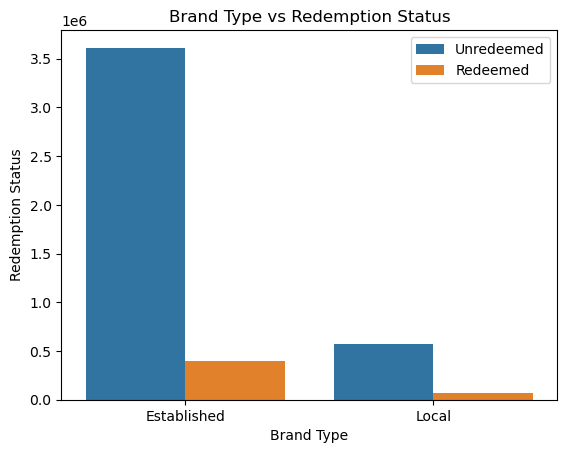

In [36]:
sns.countplot(x='brand_type', hue='redemption_status', data=train_data)
plt.xlabel('Brand Type')
plt.ylabel('Redemption Status')
plt.title('Brand Type vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

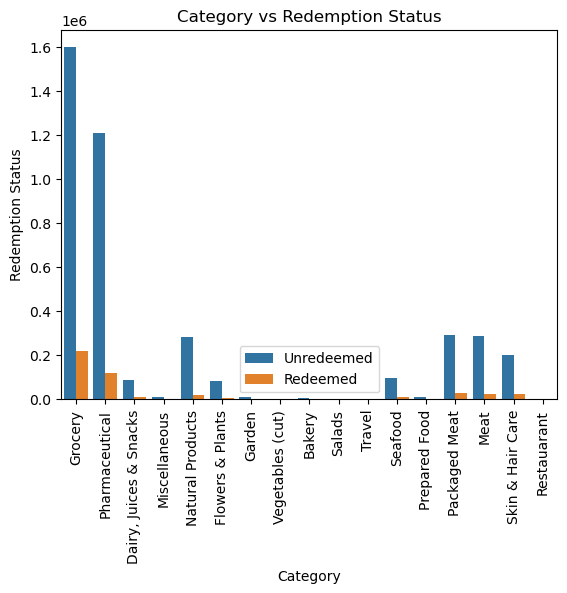

In [37]:
sns.countplot(x='category', hue='redemption_status', data=train_data)
plt.xlabel('Category')
plt.ylabel('Redemption Status')
plt.title('Category vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.xticks(rotation=90)
plt.show()